## RNN(IMDB)
* MaxLen: 176(取x_train和x_test的中位數)
* Words: 128000, Embeddding: 64
* Batch_size: 128, Epochs: 16(但使用Earlystopping可能會提早結束)
* Optimizer: Nadam + SGD   
(因為Nadam收斂速度較快但不一定會收斂，所以嘗試再用SGD逼近，但似乎沒什麼作用，也有可能Nadam做完已經離最佳解太遠了)
* Loss: binary crossentropy
* RNN: 雙向LSTM(128) -> 不只考慮了上下文中「上文」，也考慮「下文」，比較不會錯過了一些重要的信息。  
(加入doupout和regularizer試圖解決overfitting效果並不顯著)

In [1]:
%matplotlib inline
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt

### 1. 讀入tensorflow套件

In [2]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, GRU, Bidirectional 
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
from tensorflow.keras.datasets import imdb

### 2. 讀入數據

In [3]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=128000)

### 3. 資料處理

In [4]:
len(x_train), len(x_test)

(25000, 25000)

In [5]:
egg1 = np.array([ len(x_train[i]) for i in range(25000) ])
egg2 = np.array([ len(x_test[i]) for i in range(25000) ])
np.median(egg1), np.median(egg2)

(178.0, 174.0)

In [6]:
#使用資料的中位數當作序列的長度
x_train = sequence.pad_sequences(x_train, maxlen=176)
x_test = sequence.pad_sequences(x_test, maxlen=176)

### 4. 打造函數學習機 (使用雙向LSTM)

In [7]:
model1 = Sequential()
model1.add(Embedding(input_dim = 128000, output_dim = 64))
model1.add(Bidirectional(LSTM(32, dropout = 0.2, recurrent_dropout = 0.2, kernel_regularizer=l2(0.001), return_sequences = True)))
model1.add(Dense(1, activation = 'sigmoid'))
model1.compile(optimizer = 'Nadam', loss = 'binary_crossentropy', metrics = ["acc"] )

In [8]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          8192000   
_________________________________________________________________
bidirectional (Bidirectional (None, None, 64)          24832     
_________________________________________________________________
dense (Dense)                (None, None, 1)           65        
Total params: 8,216,897
Trainable params: 8,216,897
Non-trainable params: 0
_________________________________________________________________


### 5. 訓練

In [9]:
# 設立一個提早停止訓練的機制避免overfitting(以val_acc為基準，如果沒有增加超過0.0005則視為沒有進步，超過三次的話就結束訓練 )  
early_stopping = EarlyStopping(monitor='val_acc', min_delta=0.0005, mode='max', patience = 5)
history = model1.fit(x_train, y_train, batch_size=100 , epochs=16, callbacks = [early_stopping], validation_data=(x_test, y_test), shuffle = True)

Train on 25000 samples, validate on 25000 samples
Epoch 1/16
25000/25000 [==============================] - 189s 8ms/sample - loss: 0.5649 - acc: 0.7539 - val_loss: 0.4303 - val_acc: 0.8286
Epoch 2/16
25000/25000 [==============================] - 189s 8ms/sample - loss: 0.3641 - acc: 0.8642 - val_loss: 0.3920 - val_acc: 0.8511
Epoch 3/16
25000/25000 [==============================] - 186s 7ms/sample - loss: 0.3223 - acc: 0.8793 - val_loss: 0.3790 - val_acc: 0.8556
Epoch 4/16
25000/25000 [==============================] - 186s 7ms/sample - loss: 0.2413 - acc: 0.9207 - val_loss: 0.3944 - val_acc: 0.8564
Epoch 5/16
25000/25000 [==============================] - 187s 7ms/sample - loss: 0.1976 - acc: 0.9373 - val_loss: 0.4209 - val_acc: 0.8425
Epoch 6/16
25000/25000 [==============================] - 189s 8ms/sample - loss: 0.1649 - acc: 0.9510 - val_loss: 0.4164 - val_acc: 0.8522
Epoch 7/16
25000/25000 [==============================] - 187s 7ms/sample - loss: 0.1380 - acc: 0.9607 - val_l

In [10]:
model1.compile(optimizer = SGD(lr = 0.005), loss = 'binary_crossentropy', metrics = ["acc"] )
history1 = model1.fit(x_train, y_train, batch_size=100, epochs=16, callbacks = [early_stopping], validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/16
25000/25000 [==============================] - 185s 7ms/sample - loss: 0.0737 - acc: 0.9831 - val_loss: 0.4950 - val_acc: 0.8474
Epoch 2/16
25000/25000 [==============================] - 179s 7ms/sample - loss: 0.0738 - acc: 0.9825 - val_loss: 0.5139 - val_acc: 0.8520
Epoch 3/16
25000/25000 [==============================] - 179s 7ms/sample - loss: 0.0712 - acc: 0.9838 - val_loss: 0.5130 - val_acc: 0.8523
Epoch 4/16
25000/25000 [==============================] - 178s 7ms/sample - loss: 0.0688 - acc: 0.9846 - val_loss: 0.5206 - val_acc: 0.8452
Epoch 5/16
25000/25000 [==============================] - 180s 7ms/sample - loss: 0.0698 - acc: 0.9844 - val_loss: 0.5165 - val_acc: 0.8482
Epoch 6/16
25000/25000 [==============================] - 181s 7ms/sample - loss: 0.0690 - acc: 0.9845 - val_loss: 0.5261 - val_acc: 0.8524
Epoch 7/16
25000/25000 [==============================] - 181s 7ms/sample - loss: 0.0690 - acc: 0.9841 - val_l

### 6.訓練結果

In [11]:
loss, acc = model1.evaluate(x_test, y_test)
print("正確率：", acc)

25000/25000 [==============================] - 54s 2ms/sample - loss: 0.5208 - acc: 0.8462
正確率： 0.8462299


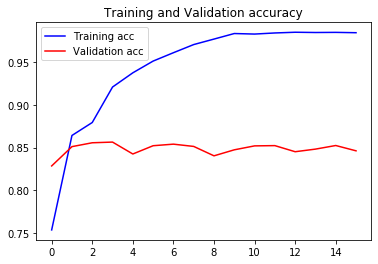

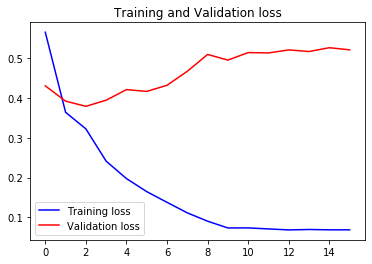

In [13]:
epochs = range(len(history.history['acc']+history1.history['acc']))
plt.plot(epochs, history.history['acc'] + history1.history['acc'], 'b', label = 'Training acc')
plt.plot(epochs, history.history['val_acc']+history1.history['val_acc'], 'r',label = 'Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, history.history['loss']+history1.history['loss'], 'b', label = 'Training loss')
plt.plot(epochs, history.history['val_loss']+history1.history['val_loss'], 'r',label = 'Validation loss')
plt.title('Training and Validation loss')
plt.legend()

### 7.問題
調過了很多參數，也試過很多方法，但準確率總是在86%左右無法提升且出現overfitting的現象
想請問助教有甚麼方法可以解決嗎